# CART
10/14/23 Monika Voutov

## **Problem 1a**

What is the total impurity value before the split? (This is the total impurity of the “null tree” or the “baseline model”.)


The impurity before the split is calculated using the Residual Sum of Squares (RSS) for the entire dataset. 

Given \( $y_1, y_2, \ldots, y_n$\) as the observed outputs for our data points:


$RSS_{\text{before}} = \sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{n}(y_i - \frac{1}{n} \sum_{i=1}^{n} y_i )^2$



## **Problem 1b**

What is the total impurity value after the split? (This is the total impurity of the
tree with the split as defined above.)


Assuming the dataset is split into two parts:

1. one with indices \( $1, 2, \ldots, N$ \), and
2. another with \( $N+1, N+2, \ldots, n$\).

The means of the outputs in these two parts are \($\bar{y_1}$\) and \($\bar{y_2}$\).

$
\bar{y_1} = \frac{1}{N} \sum_{i=1}^{N} y_i 
$

$
\bar{y_2} = \frac{1}{n-N} \sum_{i=N+1}^{n} y_i 
$

Then, the RSS for the two partitions are:

$
RSS_{1,\text{after}} = \sum_{i=1}^{N}(y_i - \bar{y_1})^2 
$

$ 
RSS_{2,\text{after}} = \sum_{i=N+1}^{n}(y_i - \bar{y_2})^2 
$

The total impurity after the split is simply the sum of these two values:

$
RSS_{\text{after}} = RSS_{1,\text{after}} + RSS_{2,\text{after}} 
$

## **Problem 1c**

Show that the total impurity value after the split is always less than or equal to
the total impurity value before the split, i.e., splitting never increases the total impurity cost
function.

Solution in handwritten in the appendix. 

## **Problem 1d**

The CART model performs splits based on a specified threshold. Introducing splits based on the exponential value of a feature should not enhance (or alter) the model. For instance, the cutoff value for the GPA example in class was 3.75. All values below and above will be split into two based on this cutoff value.

Similarly, taking the exponent of the GPA values would merely change the distance between points but preserve the ordering, because the exponential function is monotonically increasing.

## **Problem 1e**

Assuming that $X_jX_l$ are 2 features multiplied together, yes, this has the potential to enhance the regression tree. Multiplying the two features can scale and alter the ordering of the values.

For instance, if $X_J=GPA$ and $X_l=Experience$, a very high GPA could be negated by zero experience when multiplied, and vice versa.
 However, a high GPA, when combined with experience, could be amplified. Therefore, the cutoff value could be based on a combination of $X_jX_l$, which in some cases might improve the model.

## **Problem 2a**

The modeling approach of treating the Missing values as an explicit category is reasonable. The missing values are values where the restaurant has not provided information. If we for example removed all the rows with missing values, then we could exclude a meaningful information from teh dataset. In the case where there are many missing values (large % proportion), it would not be a good idea to remove missing rows because it could lead to biased data. 

## **Problem 2b**

In [ ]:
import pandas as pd
import numpy as np

training_data = pd.read_csv('data/yelp142_train.csv')
testing_data = pd.read_csv('data/yelp142_test.csv')

# check the shape of training and testing data
training_data.shape, testing_data.shape

((6272, 13), (2688, 13))

### **Below is the code for building the linear regression model.**

I am using `'C(GoodForKids, Treatment(reference="(Missing)"))` for each variable having missing values in the ols model. Adding all variables in the data.

In [2]:
import statsmodels.formula.api as smf

linreg = smf.ols(formula = 'stars ~ review_count'\
                '+ C(GoodForKids, Treatment(reference="(Missing)"))'\
                '+ C(Alcohol, Treatment(reference="(Missing)"))'\
                '+ C(BusinessAcceptsCreditCards , Treatment(reference="(Missing)"))'\
                '+ C(WiFi, Treatment(reference="(Missing)"))'\
                '+ C(BikeParking, Treatment(reference="(Missing)"))'\
                '+ C(ByAppointmentOnly, Treatment(reference="(Missing)"))'\
                '+ C(WheelechairAccessible, Treatment(reference="(Missing)"))'\
                '+ C(OutdoorSeating, Treatment(reference="(Missing)"))'\
                '+ C(RestaurantsReservations, Treatment(reference="(Missing)"))'\
                '+ C(DogsAllowed, Treatment(reference="(Missing)"))'\
                '+ C(Caters, Treatment(reference="(Missing)"))',
                 
                 data= training_data).fit()

linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.38
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          1.46e-235
Time:                        19:52:19   Log-Likelihood:                -7239.0
No. Observations:                6272   AIC:                         1.453e+04
Df Residuals:                    6246   BIC:                         1.471e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.4062      0.040     84.470      0.000       3.327       3.485
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                    0.0196      0.045      0.434      0.664      -0.069       0.108
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.0966      0.035     -2.759      0.006      -0.165      -0.028
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.2451      0.048      5.129      0.000       0.151       0.339
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                   0.1200      0.044      2.732      0.006       0.034       0.206
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.1211      0.040      3.046      0.002       0.043       0.199
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     0.4796      0.090      5.318      0.000       0.303       0.656
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.0513      0.047      1.089      0.276      -0.041       0.144
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                          0.1519      0.034      4.438      0.000       0.085       0.219
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                            0.1468      0.033      4.442      0.000       0.082       0.212
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.2846      0.110     -2.581      0.010      -0.501      -0.068
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.2009      0.032     -6.284      0.000      -0.264      -0.138
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.1200      0.029     -4.177      0.000      -0.176      -0.064
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.1270      0.033      3.797      0.000       0.061       0.193
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               0.2601      0.098      2.667      0.008       0.069       0.451
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          0.7377      0.092      8.011      0.000       0.557       0.918
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           0.3651      0.027     13.284      0.000       0.311       0.419
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.1359      0.040     -3.389      0.001      -0.215      -0.057
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                 -0.0253      0.043     -0.591      0.555      

#### Make dummy variables

In [3]:
training_data_dummies = pd.get_dummies(training_data)
testing_data_dummies = pd.get_dummies(testing_data)

### **Building A CART Model**

I have created dummy variables for all categorical variables. Then I am creating training data for the `y` axis with `stars` variable and `x` axis with the rest of the data. I am creating a 5-fold cross validation model with ccp_aplha values, wehre testing 150 values between 0 and 0.1. Then using for the scoring `r2`. Once I have the best `ccp_alpha`, I compute the OSR2 for both the CART regression and the linear regression. I also compute MAE for both.

In [4]:
training_data_dummies_y = training_data_dummies['stars']
training_data_dummies_x = training_data_dummies.drop(['stars'], axis=1)
training_data_dummies_x.head()

,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,...,OutdoorSeating_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE
0,16,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,537,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,444,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,4,1,0,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,3,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.model_selection import GridSearchCV, KFold

grid_values = {"ccp_alpha": np.linspace(0,0.1,150)}

# Initialize the decision tree regressor
dtr = DecisionTreeRegressor()

# Set up cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Perform grid search with cross-validation
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring="r2", cv=cv, verbose=0)
dtr_cv.fit(training_data_dummies_x, training_data_dummies_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.        , 0.00067114, 0.00134228, 0.00201342, 0.00268456,
       0.0033557 , 0.00402685, 0.00469799, 0.00536913, 0.00604027,
       0.00671141, 0.00738255, 0.00805369, 0.00872483, 0.00939597,
       0.01006711, 0.01073826, 0.0114094 , 0.01208054, 0.01275168,
       0.01342282, 0....
       0.07718121, 0.07785235, 0.07852349, 0.07919463, 0.07986577,
       0.08053691, 0.08120805, 0.08187919, 0.08255034, 0.08322148,
       0.08389262, 0.08456376, 0.0852349 , 0.08590604, 0.08657718,
       0.08724832, 0.08791946, 0.0885906 , 0.08926174, 0.08993289,
       0.09060403, 0.09127517, 0.09194631, 0.09261745, 0.09328859,
       0.09395973, 0.09463087, 0.09530201, 0.09597315, 0.0966443 ,
       0.09731544, 0.09798658, 0.09865772, 0.09932886, 0.1       ])},
             scoring='r2')

In [7]:
best_tree = dtr_cv.best_estimator_
print(best_tree)

DecisionTreeRegressor(ccp_alpha=0.001342281879194631)


### 2b iii)

### OSR2 for CART

In [8]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)


y_test = testing_data_dummies['stars']
X_test = testing_data_dummies.drop(['stars'], axis=1)

print('OSR2 using CART:', OSR2(dtr_cv, X_test, y_test, training_data_dummies_y))

OSR2 using CART: 0.1504339434181572


### OSR2 for Linear Regression

In [9]:
print('OSR2 using Linear Regression: 0.173' )

OSR2 using Linear Regression: 0.173


### Mean Absolute Error (MAE) for CART

In [10]:
def MAE(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    ABS = np.sum(np.abs(y_pred - y_test))
    n = len(y_pred)           
    return (ABS/n)

In [11]:
print('MAE for CART:', MAE(dtr_cv, X_test, y_test))

MAE for CART: 0.617440936299048


### Mean Absolute Error (MAE) for Linear Regression

In [12]:
# Generating predictions
predictions = linreg.predict(testing_data)

# Actual outcomes
actual_outcomes = testing_data['stars']

# Calculating MAE
mae = np.mean(np.abs(actual_outcomes - predictions))

print(f'Mean Absolute Error (MAE) for Linear Regression: {mae}')

Mean Absolute Error (MAE) for Linear Regression: 0.6259556143398644


In [13]:
print('OSR2 using CART:', OSR2(dtr_cv, X_test, y_test, training_data_dummies_y))
print('OSR2 using Linear Regression: 0.173' )

print('MAE for CART:', MAE(dtr_cv, X_test, y_test))
print(f'Mean Absolute Error (MAE) for Linear Regression: {mae}')

OSR2 using CART: 0.1504339434181572
OSR2 using Linear Regression: 0.173
MAE for CART: 0.617440936299048
Mean Absolute Error (MAE) for Linear Regression: 0.6259556143398644


The Linear regression outperforms slightly CART regression. This means that the data can be explained just as well or even better with a very simplistic linear regression model and not necessary to build a complex CART model. Also, LinReg is very easy to interpet so it is the better choice of the two. 

Just to mention, none of these models are by any means good. But LinReg is better relative to CART.

## **Problem 2c**

### Creating 4+ star column, dropping 'stars' column

In [14]:
training_data_4 = testing_data.copy(deep=True)
testing_data_4 = testing_data.copy(deep=True)
training_data_4['fourOrAbove'] = [1 if i >= 4.0 else 0 for i in training_data_4['stars']]
testing_data_4['fourOrAbove'] = [1 if i >= 4.0 else 0 for i in testing_data_4['stars']]

training_data_4.drop(['stars'], axis=1, inplace=True)
testing_data_4.drop(['stars'], axis=1, inplace=True)
training_data_4.head()


,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,99,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,FALSE,TRUE,0
1,5,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),(Missing),1
2,20,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),0
3,40,(Missing),'none',(Missing),'no',FALSE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing),0
4,19,TRUE,(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing),1


## **Problem 2d**

### 2d i)

We do not explicitly know what the costs between FP and FN are, so we can assume to weight them equally. 

One might argue that FP might cause someone to choose to go to a particular restaurant which in turn might be worse than 4 stars however I cannot see to quantify that being a stronger factor in the modeling. Therefore, I will assume equal weight.

### 2d ii)

### Creating new predictions based on 4+ stars

Using the previous models but adding the treshold of 4.0 stars

In [15]:
# new predictions for ols
ols_predictions = linreg.predict(testing_data.drop(['stars'], axis=1))
ols_predictions_4 = [1 if i >= 4.0 else 0 for i in ols_predictions]

# new predictions for cart
cart_predictions = dtr_cv.predict(X_test)
cart_predictions_4 = [1 if i >= 4.0 else 0 for i in cart_predictions]

#sanity check
np.sum(ols_predictions_4), np.sum(cart_predictions_4)


(311, 294)

### 2d iii)

### Logistic Regression

Building Logistic Regression, using `fouOrAbove` instead of `stars` and the same approach as in the ols with `C(GoodForKids, Treatment(reference="(Missing)"))` treating the `missing` responses.

In [16]:
logreg = smf.logit(formula = 'fourOrAbove ~ review_count'\
                '+ C(GoodForKids, Treatment(reference="(Missing)"))'\
                '+ C(Alcohol, Treatment(reference="(Missing)"))'\
                '+ C(BusinessAcceptsCreditCards , Treatment(reference="(Missing)"))'\
                '+ C(WiFi, Treatment(reference="(Missing)"))'\
                '+ C(BikeParking, Treatment(reference="(Missing)"))'\
                '+ C(ByAppointmentOnly, Treatment(reference="(Missing)"))'\
                '+ C(WheelechairAccessible, Treatment(reference="(Missing)"))'\
                '+ C(OutdoorSeating, Treatment(reference="(Missing)"))'\
                '+ C(RestaurantsReservations, Treatment(reference="(Missing)"))'\
                '+ C(DogsAllowed, Treatment(reference="(Missing)"))'\
                '+ C(Caters, Treatment(reference="(Missing)"))',
                 data= training_data_4).fit()

logreg.summary()

Optimization terminated successfully.
         Current function value: 0.604252
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fourOrAbove   No. Observations:                 2688
Model:                          Logit   Df Residuals:                     2662
Method:                           MLE   Df Model:                           25
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.1191
Time:                        19:52:41   Log-Likelihood:                -1624.2
converged:                       True   LL-Null:                       -1843.8
Covariance Type:            nonrobust   LLR p-value:                 2.741e-77
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -0.6378      0.158     -4.027      0.000      -0.948      -0.327
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                   -0.0163      0.199     -0.082      0.935      -0.407       0.374
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.3367      0.154     -2.191      0.028      -0.638      -0.035
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.1028      0.199      0.518      0.605      -0.286       0.492
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                   0.0062      0.187      0.033      0.974      -0.361       0.373
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.2749      0.167      1.642      0.101      -0.053       0.603
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     1.6105      0.419      3.841      0.000       0.789       2.432
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.3159      0.188      1.677      0.094      -0.053       0.685
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                         -0.2921      0.152     -1.919      0.055      -0.590       0.006
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                           -0.1624      0.146     -1.110      0.267      -0.449       0.124
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.6022      0.473     -1.274      0.203      -1.529       0.324
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.1910      0.138     -1.379      0.168      -0.462       0.080
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.1109      0.123     -0.901      0.367      -0.352       0.130
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.5355      0.151      3.543      0.000       0.239       0.832
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               1.1665      0.687      1.697      0.090      -0.181       2.513
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          1.3500      0.383      3.523      0.000       0.599       2.101
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           1.0442      0.118      8.822      0.000       0.812       1.276
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.0430      0.170     -0.254      0.800      -0.375       0.289
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                  0.2062      0.180      1.146      0.252      -0.147       0.559
C(RestaurantsReservations, Treatment(reference="(Missing)"))[T.FALSE]       -0.4940      0.173     -2.856      0.004      -0.833      -0.15

### 2d iv)

### CART model using 4+ stars

Building 5-fold Cross-Validation, testing 250 values for `ccp_aplha` between 0 and 0.1, and building a desicion tree classifier with scoring "accuracy".

Once the ccp_alpha is identified by check `.best_estimator_`. 

I then built a single desicion tree clasiffier using the `ccp_alpha` from the CV, so I can plot the tree. My tree has 43 nodes (it is quite large and evry hard to interpret). I could have prunned it but the promted does not ask for that, so I am leaving it.

In [17]:
training_data_4_dummies_x = pd.get_dummies(training_data_4.drop(['fourOrAbove'], axis=1))
testing_data_4_dummies_x =  pd.get_dummies(testing_data_4.drop(['fourOrAbove'], axis=1))

training_data_4_dummies_y = testing_data_4['fourOrAbove']
testing_data_4_dummies_y = training_data_4['fourOrAbove']

In [18]:
from sklearn.tree import DecisionTreeClassifier

grid_values = {"ccp_alpha": np.linspace(0,0.1,250)}

# Initialize the decision tree classifier
dtc = DecisionTreeClassifier()

# Set up cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Perform grid search with cross-validation
dtc_4_cv = GridSearchCV(dtc, param_grid=grid_values, scoring="accuracy", cv=cv, verbose=0)
dtc_4_cv.fit(training_data_4_dummies_x, training_data_4_dummies_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00040161, 0.00080321, 0.00120482, 0.00160643,
       0.00200803, 0.00240964, 0.00281124, 0.00321285, 0.00361446,
       0.00401606, 0.00441767, 0.00481928, 0.00522088, 0.00562249,
       0.0060241 , 0.0064257 , 0.00682731, 0.00722892, 0.00763052,
       0.00803213, 0...
       0.08634538, 0.08674699, 0.08714859, 0.0875502 , 0.08795181,
       0.08835341, 0.08875502, 0.08915663, 0.08955823, 0.08995984,
       0.09036145, 0.09076305, 0.09116466, 0.09156627, 0.09196787,
       0.09236948, 0.09277108, 0.09317269, 0.0935743 , 0.0939759 ,
       0.09437751, 0.09477912, 0.09518072, 0.09558233, 0.09598394,
       0.09638554, 0.09678715, 0.09718876, 0.09759036, 0.09799197,
       0.09839357, 0.09879518, 0.09919679, 0.09959839, 0.1       ])},
             scoring='accuracy')

In [19]:
best_tree_4 = dtc_4_cv.best_estimator_
print(best_tree_4)

DecisionTreeClassifier(ccp_alpha=0.0012048192771084338)


In [20]:

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.0012048192771084338,
                             random_state = 88)

dtc = dtc.fit(training_data_4_dummies_x, training_data_4_dummies_y)


Node count = 43


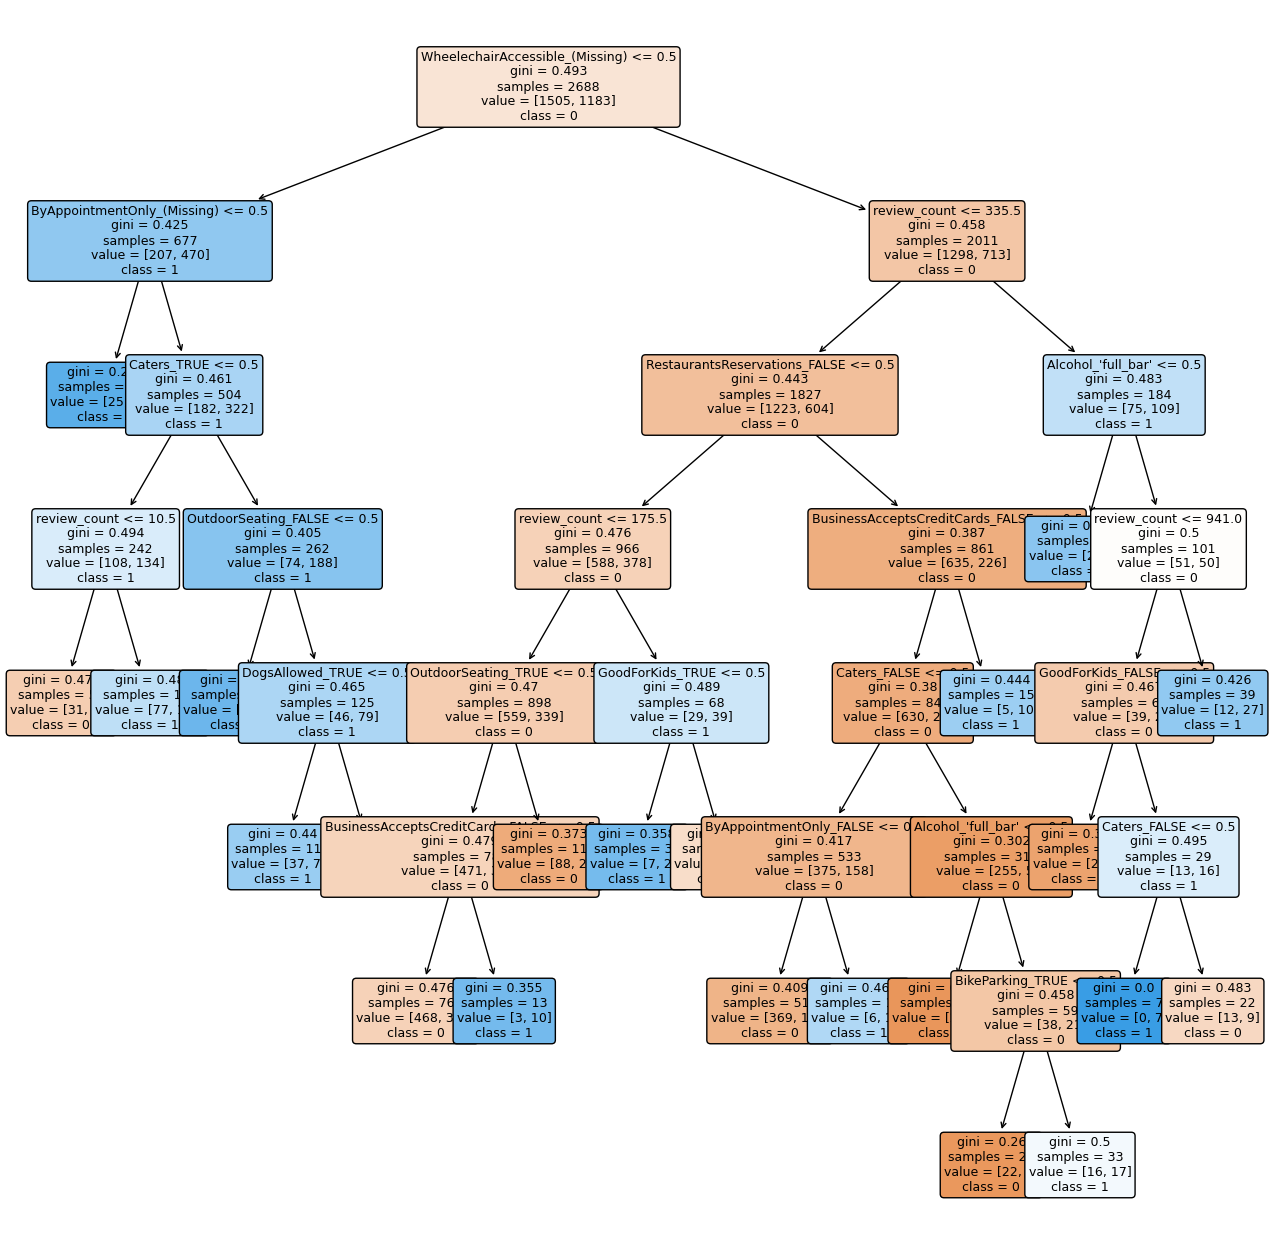

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names_str = list(training_data_4_dummies_x.columns.astype(str))

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(16,16))
plot_tree(dtc,
            feature_names=feature_names_str, 
            class_names=['0','1'], 
            filled=True,
            impurity=True,
            rounded=True,
            fontsize=9
        ) 
plt.show()

### 2 d v)

### Creating TPR and TNR for all models

Linear regression 4 stars : `ols_predictions_4`

CART regression 4 stars :` cart_predictions_4`

Logistic regression: `logreg`

CART classifier: `dtc`

Base model: `base`


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

def compute_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    tn, fp, fn, tp = confusion_matrix(true_labels, predictions).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return accuracy, tpr, fpr


# Baseline model
# Identify the majority class
majority_class = testing_data_4['fourOrAbove'].mode()[0]
# Create a baseline model that always predicts the majority class
baseline_predictions = [majority_class] * len(testing_data_4)
baseline_metrics = compute_metrics(testing_data_4['fourOrAbove'], baseline_predictions)

# OLS model
ols_metrics = compute_metrics(testing_data_4['fourOrAbove'], ols_predictions_4)

# CART regression model
cart_metrics = compute_metrics(testing_data_4['fourOrAbove'], cart_predictions_4)

# Logistic regression model
logreg_predictions_binary = [1 if i >= 0.5 else 0 for i in logreg.predict(testing_data_4)]
logreg_metrics = compute_metrics(testing_data_4['fourOrAbove'], logreg_predictions_binary)

# CART classifier model
# Predictions from the Decision Tree Classifier model
dtc_predictions = dtc.predict(testing_data_4_dummies_x)
dtc_metrics = compute_metrics(testing_data_4_dummies_y, dtc_predictions)




In [23]:
# Using the provided metrics from the function
metrics_data = {
    "Baseline": baseline_metrics,
    "OLS Regression": ols_metrics,
    "CART Regression": cart_metrics,
    "Logistic Regression": logreg_metrics,
    "CART Classifier": dtc_metrics
}

# Creating a DataFrame to display the metrics in a table
metrics_df = pd.DataFrame.from_dict(metrics_data, orient='index', columns=['Accuracy', 'TPR', 'FPR'])

metrics_df

,Accuracy,TPR,FPR
Baseline,0.559896,0.000000,0.000000
OLS Regression,0.632440,0.213863,0.038538
CART Regression,0.626116,0.199493,0.038538
Logistic Regression,0.684152,0.502959,0.173422
CART Classifier,0.697917,0.516484,0.159468


|                    | Accuracy | TPR      | FPR      |
|--------------------|----------|----------|----------|
| Baseline           | 0.559896 | 0.000000 | 0.000000 |
| OLS Regression     | 0.632440 | 0.213863 | 0.038538 |
| CART Regression    | 0.626116 | 0.199493 | 0.038538 |
| Logistic Regression| 0.684152 | 0.502959 | 0.173422 |
| CART Classifier    | 0.697917 | 0.516484 | 0.159468 |


The baseline model provides a naïve prediction by always predicting the majority class, hence both the TPR and FPR are 0. It serves as a minimum performance benchmark. Both Logistic Regression and the CART Classifier have the highest accuracy and TPR. However, they also have the highest FPR. The CART Regression model is less effective than OLS Regression in terms of accuracy and TPR, making it a less desirable model compared to linear regression.

The choice largely hinges on the emphasis we place on true positives versus false positives. If maintaining a low FPR is paramount, then the Linear Regression model might be the suitable choice. For this problem, FPR is not critical. Therefore, one might opt for either Logistic Regression or the CART Classifier. While the CART Classifier slightly outperforms Logistic Regression, it lacks easy interpretability. Since Logistic Regression is more interpretable, the choice really depends on the audience and who will be interpreting the model.

I personally would prioritize the best accuracy, despite the complexity in interpretation, and therefore choose the CART Classifier. It boasts the highest accuracy rate and TPR. Even though it has a high FPR, it is still lower than that of Logistic Regression, and in this case, having a false positive while choosing a restaurant might lead to just one bad dinner.

In [24]:
%%capture
!jupyter nbconvert --to html homework3.ipynb